## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# visualization
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Check for imbalance
application_df['IS_SUCCESSFUL'].value_counts()

,count
IS_SUCCESSFUL,
1,18261
0,16038


In [ ]:
# Analyzing data frame
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(['EIN', 'NAME'], axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB
None


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500
application_types_to_replace = df['APPLICATION_TYPE'].value_counts().loc[df['APPLICATION_TYPE'].value_counts() < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df['CLASSIFICATION'].value_counts().loc[df['CLASSIFICATION'].value_counts() > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 100
classifications_to_replace = df['CLASSIFICATION'].value_counts().loc[df['CLASSIFICATION'].value_counts() < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [ ]:
# Let's try with a cutoff of 100. Potentially we could set the cutoff to 500, but let's try 100 at first

In [ ]:
# Analyze the data frame again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [ ]:
# Look at AFFILIATION value counts to identify and replace with "Other"
df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [ ]:
# No need to bucket AFFILIATION and it already has an Other category. We can try this first

In [ ]:
# Look at USE_CASE value counts to identify and replace with "Other"
df['USE_CASE'].value_counts()

,count
USE_CASE,
Preservation,28095
ProductDev,5671
CommunityServ,384
Heathcare,146
Other,3


In [ ]:
# No need to bucket USE_CASE and it already has an Other category. We can try this first

In [ ]:
# Look at ORGANIZATION value counts to identify and replace with "Other"
df['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Co-operative,486
Corporation,43


In [ ]:
# No need to bucket ORGANIZATION. We can try this first

In [ ]:
# Look at SPECIAL_CONSIDERATIONS value counts to identify and replace with "Other"
df['SPECIAL_CONSIDERATIONS'].value_counts()

,count
SPECIAL_CONSIDERATIONS,
N,34272
Y,27


In [ ]:
# NOTE: SPECIAL_CONSIDERATIONS is very imbalance and can impact our performance.
# Also, SPECIAL_CONSIDERATIONS is a boolean which we can easily convert Y=1 and N=0
df['SPECIAL_CONSIDERATIONS'] = df['SPECIAL_CONSIDERATIONS'].replace('Y', 1)
df['SPECIAL_CONSIDERATIONS'] = df['SPECIAL_CONSIDERATIONS'].replace('N', 0)

In [ ]:
# Review the new dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  int64 
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.6+ MB
None


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,0,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,0,142590,1


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(df, dtype=int)
df.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = df.drop('IS_SUCCESSFUL', axis=1)
y = df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
def compile_train(hidden_nodes_layers, number_input_features, number_of_epochs):
  # Define the model - deep neural net
  nn_model = tf.keras.models.Sequential()

  # Add the input layer
  nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layers[0]['units'], input_dim=number_input_features, activation=hidden_nodes_layers[0]['activation']))

  # Add the hidden layers
  for layer in hidden_nodes_layers[1:]:
    nn_model.add(tf.keras.layers.Dense(units=layer['units'], activation=layer['activation']))

  # Add the output layer
  nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

  # Check the structure of the model
  print(nn_model.summary())

  #####
  # Compile the model
  nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  #####
  # Train the model
  fit_model = nn_model.fit(X_train_scaled, y_train, epochs=number_of_epochs)

  #####
  # Evaluate the model using the test data
  model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
  print("-----")
  print(f"Accuracy: {model_accuracy},\nLoss:     {model_loss}")
  print("-----")

  #####
  # Visualize training history
  # Create a DataFrame containing training history
  history_df = pd.DataFrame(fit_model.history)

  # Increase the index by 1 to match the number of epochs
  history_df.index += 1

  # Plot the accuracy
  history_df.plot(y="accuracy")
  plt.show()

  # Plot the loss
  history_df.plot(y="loss")
  plt.show()

  return nn_model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6386 - loss: 0.6850
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7156 - loss: 0.5996
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7152 - loss: 0.5885
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7133 - loss: 0.5826
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7107 - loss: 0.5839
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7171 - loss: 0.5796
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7126 - loss: 0.5825
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7128 - loss: 0.5819
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7143 - loss: 0.5784
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7115 - loss: 0.5814
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7139 - loss: 0.5788
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━

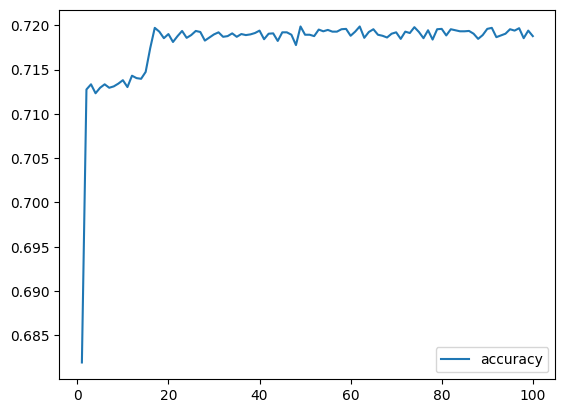

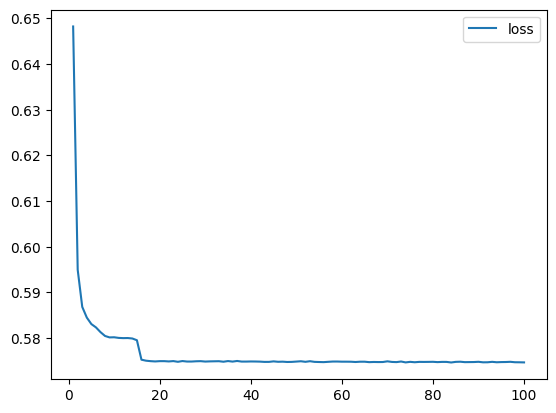

In [ ]:
# Activation tests
# Call compile_train for one node of one unit with the activation of relu to create a base to start
nodes_layers = [{'units': 1, 'activation': 'relu'}]
nn_model_01 = compile_train(nodes_layers, len(X_train_scaled[0]), 100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5990 - loss: 0.6714
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7179 - loss: 0.5886
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7238 - loss: 0.5811
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7317 - loss: 0.5721
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5712
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7327 - loss: 0.5732
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7265 - loss: 0.5773
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7246 - loss: 0.5774
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7309 - loss: 0.5736
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7333 - loss: 0.5702
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7287 - loss: 0.5757
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━

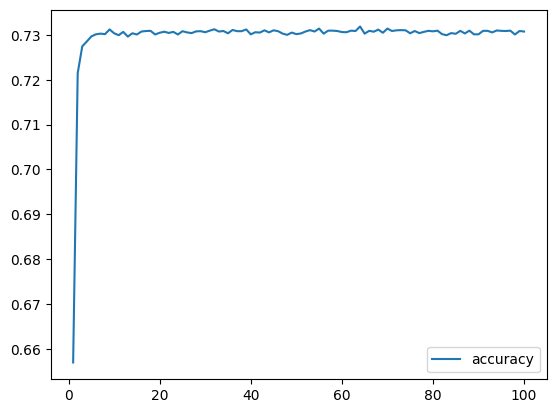

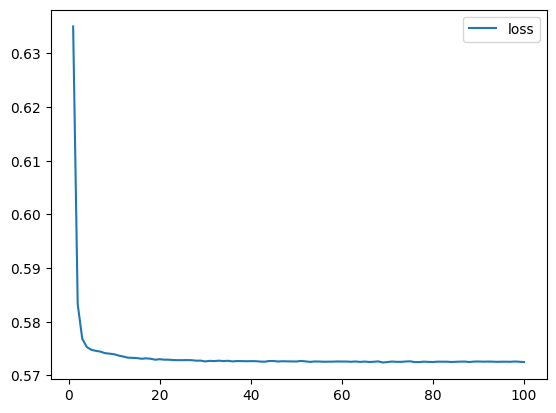

In [ ]:
# Call compile_train for one node of one unit with the activation of tanh to compare with relu
nodes_layers = [{'units': 1, 'activation': 'tanh'}]
nn_model_02 = compile_train(nodes_layers, len(X_train_scaled[0]), 100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │             245 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6076 - loss: 0.6554
Epoch 2/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7250 - loss: 0.5696
Epoch 3/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7282 - loss: 0.5613
Epoch 4/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.5585
Epoch 5/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7309 - loss: 0.5551
Epoch 6/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7274 - loss: 0.5608
Epoch 7/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.5526
Epoch 8/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.5537
Epoch 9/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7315 - loss: 0.5505
Epoch 10/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7293 - loss: 0.5564
Epoch 11/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7359 - loss: 0.5448
Epoch 12/250
804/804 ━━━━━━━━━━━━━━━

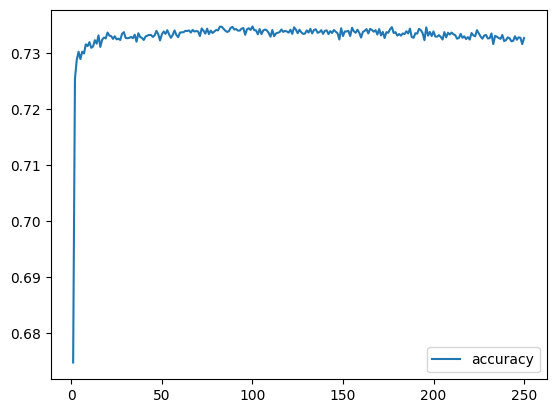

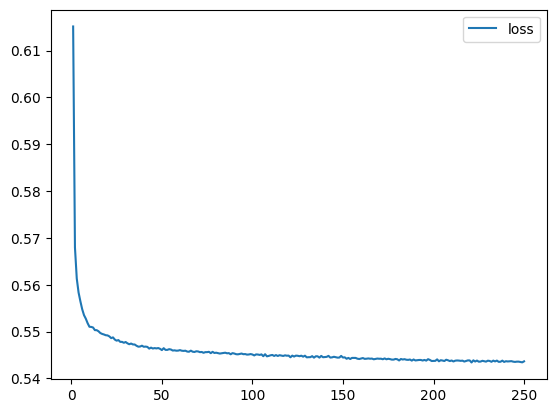

In [ ]:
# Increasing complexity on the model tests
# Since tanh performed better than relu, compile_train for two nodes (5, 3) with the activation of tanh and increase epochs to 250
nodes_layers = [{'units': 5, 'activation': 'tanh'},
                {'units': 3, 'activation': 'tanh'}]
nn_model_03 = compile_train(nodes_layers, len(X_train_scaled[0]), 250)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 3)                   │             147 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6324 - loss: 0.6559
Epoch 2/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7169 - loss: 0.5805
Epoch 3/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7248 - loss: 0.5671
Epoch 4/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7217 - loss: 0.5697
Epoch 5/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7203 - loss: 0.5671
Epoch 6/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.5590
Epoch 7/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7259 - loss: 0.5616
Epoch 8/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7285 - loss: 0.5585
Epoch 9/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7297 - loss: 0.5571
Epoch 10/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7301 - loss: 0.5540
Epoch 11/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7275 - loss: 0.5574
Epoch 12/150
804/804 ━━━━━━━━━━━━━━━

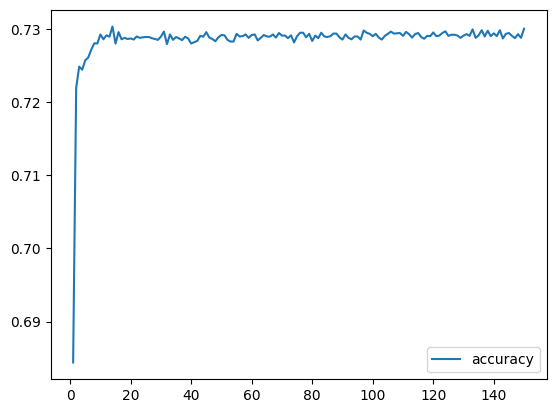

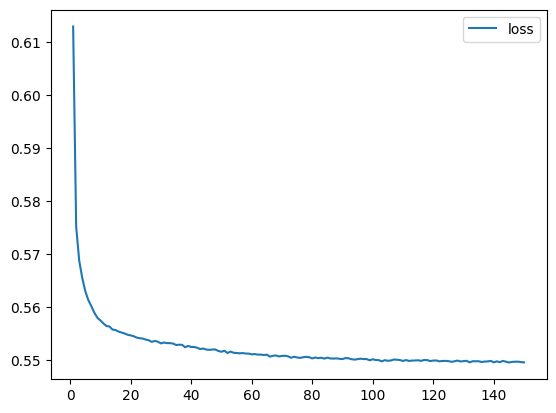

In [ ]:
# Reduce the number of neurons, and reduce the number of epochs
# Call compile_train for two nodes (3, 1) with the activation of tanh and increase epochs to 150
nodes_layers = [{'units': 3, 'activation': 'tanh'},
                {'units': 1, 'activation': 'tanh'}]
nn_model_04 = compile_train(nodes_layers, len(X_train_scaled[0]), 150)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519 (2.03 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6354 - loss: 0.6394
Epoch 2/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7253 - loss: 0.5746
Epoch 3/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7334 - loss: 0.5607
Epoch 4/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7306 - loss: 0.5588
Epoch 5/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7316 - loss: 0.5544
Epoch 6/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7314 - loss: 0.5540
Epoch 7/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7271 - loss: 0.5581
Epoch 8/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7330 - loss: 0.5501
Epoch 9/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7289 - loss: 0.5533
Epoch 10/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7284 - loss: 0.5518
Epoch 11/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7270 - loss: 0.5540
Epoch 12/500
804/804 ━━━━━━━━━━━━━━━

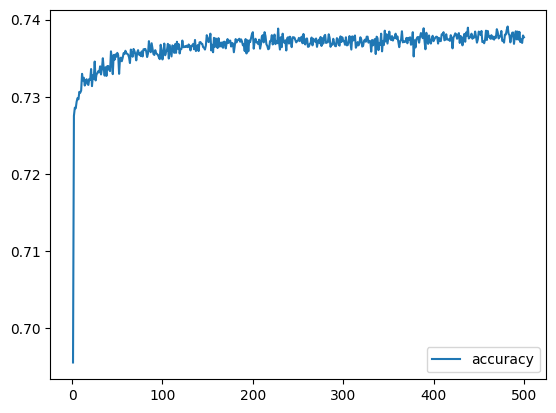

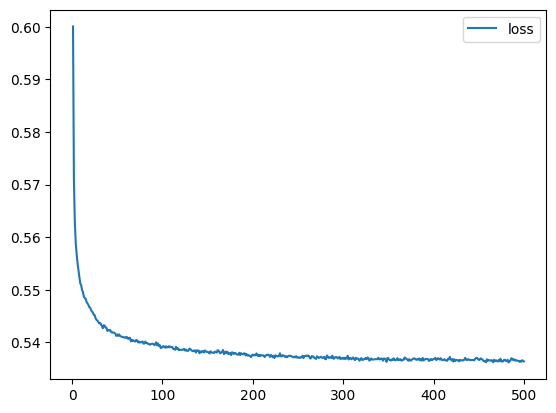

In [ ]:
# Since the difference in accuracy and loss are marginal, let's try complex models
# Call compile_train for five nodes (8, 7, 5, 3, 1) with the activation of tanh and increase epochs to 500
nodes_layers = [{'units': 8, 'activation': 'tanh'},
                {'units': 7, 'activation': 'tanh'},
                {'units': 5, 'activation': 'tanh'},
                {'units': 3, 'activation': 'tanh'},
                {'units': 1, 'activation': 'tanh'}]
nn_model_05 = compile_train(nodes_layers, len(X_train_scaled[0]), 500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519 (2.03 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5257 - loss: 0.6921
Epoch 2/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5269 - loss: 0.6917
Epoch 3/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5278 - loss: 0.6916
Epoch 4/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5322 - loss: 0.6911
Epoch 5/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5336 - loss: 0.6909
Epoch 6/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5320 - loss: 0.6911
Epoch 7/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5315 - loss: 0.6912
Epoch 8/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5307 - loss: 0.6913
Epoch 9/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5379 - loss: 0.6904
Epoch 10/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5267 - loss: 0.6918
Epoch 11/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5290 - loss: 0.6915
Epoch 12/500
804/804 ━━━━━━━━━━━━━━━

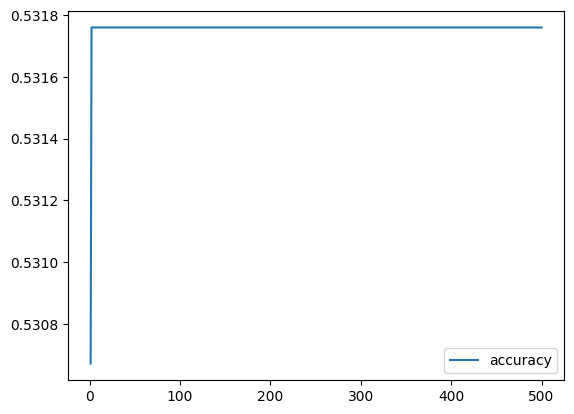

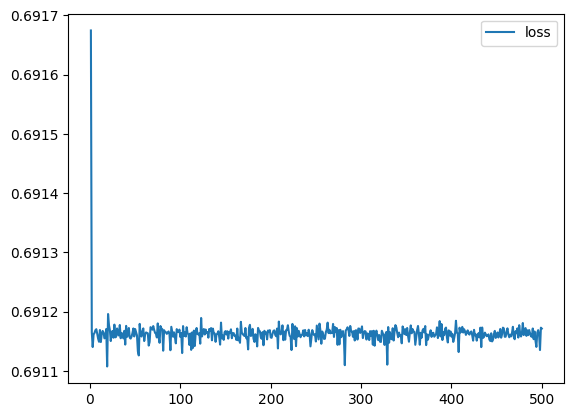

In [ ]:
# To contrast, let's run the same complex model with relu
# Call compile_train for five nodes (8, 7, 5, 3, 1) with the activation of tanh and increase epochs to 500
nodes_layers = [{'units': 8, 'activation': 'relu'},
                {'units': 7, 'activation': 'relu'},
                {'units': 5, 'activation': 'relu'},
                {'units': 3, 'activation': 'relu'},
                {'units': 1, 'activation': 'relu'}]
nn_model_06 = compile_train(nodes_layers, len(X_train_scaled[0]), 500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519 (2.03 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6596 - loss: 0.6545
Epoch 2/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7288 - loss: 0.5822
Epoch 3/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7327 - loss: 0.5719
Epoch 4/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7304 - loss: 0.5677
Epoch 5/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7279 - loss: 0.5659
Epoch 6/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7300 - loss: 0.5591
Epoch 7/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7279 - loss: 0.5605
Epoch 8/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5567
Epoch 9/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7329 - loss: 0.5550
Epoch 10/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7341 - loss: 0.5530
Epoch 11/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7349 - loss: 0.5487
Epoch 12/500
804/804 ━━━━━━━━━━━━━━━

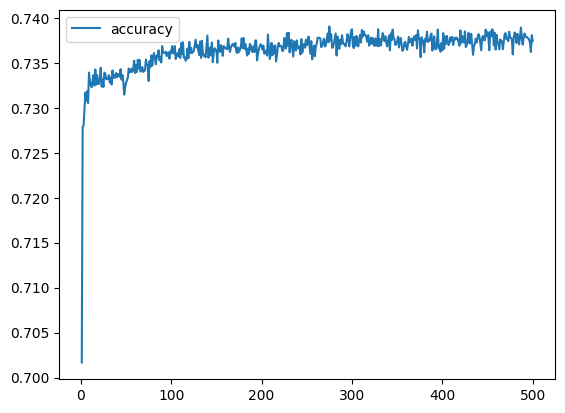

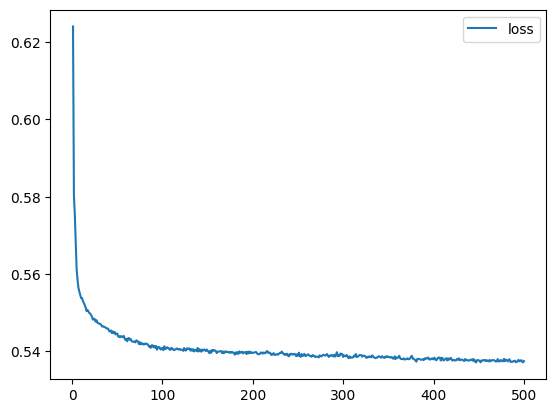

In [ ]:
# Relu performed worse than tanh. Compare a combination of activation between relu and tanh
# Call compile_train for five nodes (8, 7, 5, 3, 1) with the activation of tanh and increase epochs to 500
nodes_layers = [{'units': 8, 'activation': 'relu'},
                {'units': 7, 'activation': 'relu'},
                {'units': 5, 'activation': 'relu'},
                {'units': 3, 'activation': 'tanh'},
                {'units': 1, 'activation': 'tanh'}]
nn_model_07 = compile_train(nodes_layers, len(X_train_scaled[0]), 500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519 (2.03 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6199 - loss: 0.6525
Epoch 2/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.5955
Epoch 3/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7293 - loss: 0.5763
Epoch 4/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7318 - loss: 0.5703
Epoch 5/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7327 - loss: 0.5710
Epoch 6/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7296 - loss: 0.5725
Epoch 7/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7289 - loss: 0.5720
Epoch 8/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7307 - loss: 0.5701
Epoch 9/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7312 - loss: 0.5709
Epoch 10/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7355 - loss: 0.5651
Epoch 11/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7290 - loss: 0.5691
Epoch 12/500
804/804 ━━━━━━━━━━━━━━━

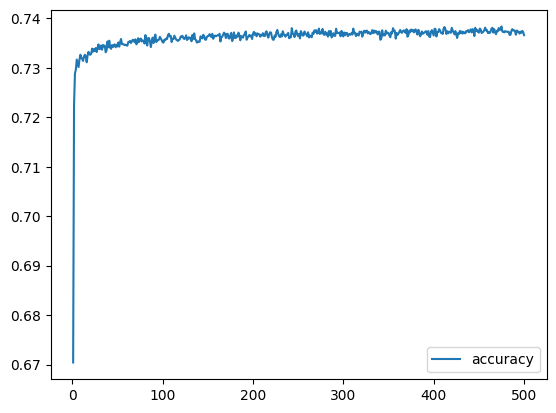

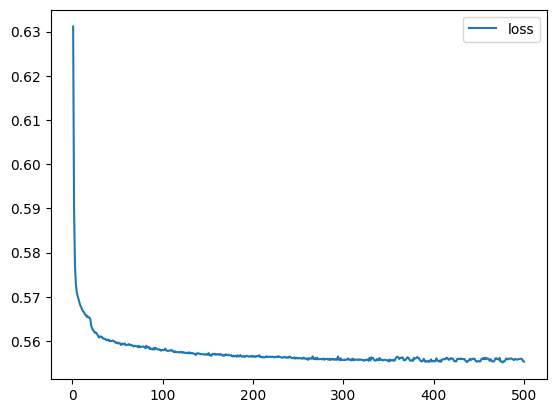

In [ ]:
# Now, try tanh as the early layers
# Call compile_train for five nodes (8, 7, 5, 3, 1) with the activation of tanh and increase epochs to 500
nodes_layers = [{'units': 8, 'activation': 'tanh'},
                {'units': 7, 'activation': 'tanh'},
                {'units': 5, 'activation': 'tanh'},
                {'units': 3, 'activation': 'relu'},
                {'units': 1, 'activation': 'relu'}]
nn_model_08 = compile_train(nodes_layers, len(X_train_scaled[0]), 500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 1)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6387 - loss: 0.6827
Epoch 2/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6960 - loss: 0.6229
Epoch 3/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6978 - loss: 0.6099
Epoch 4/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6975 - loss: 0.6050
Epoch 5/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7039 - loss: 0.5999
Epoch 6/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6988 - loss: 0.6046
Epoch 7/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6992 - loss: 0.6044
Epoch 8/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6992 - loss: 0.6036
Epoch 9/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7065 - loss: 0.5998
Epoch 10/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7032 - loss: 0.5994
Epoch 11/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7045 - loss: 0.5993
Epoch 12/1500
804/804 ━━━

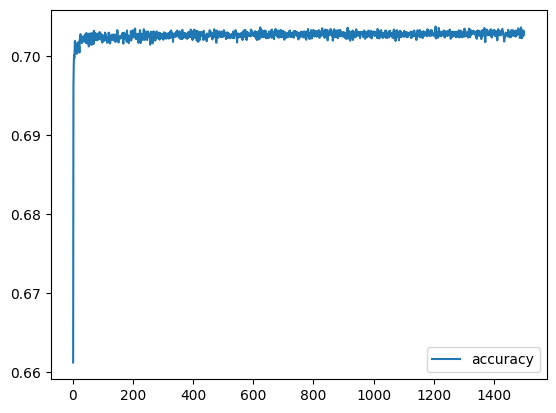

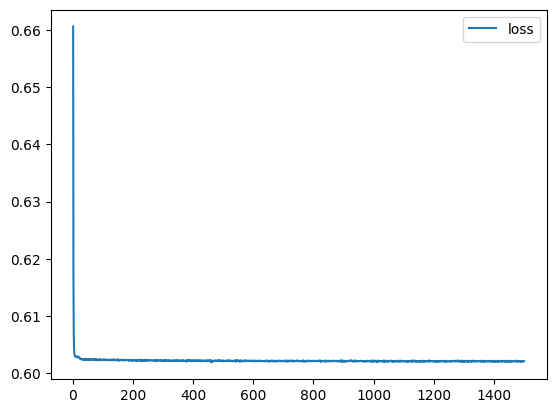

In [ ]:
# Extreme number of epochs tests
# Since complex models didn't show any promising improvements, compare extremes. This time a very large number of epochs on a single hidden layer
# Call compile_train for one node of one unit with the activation of relu and 1500 epochs
nodes_layers = [{'units': 1, 'activation': 'relu'}]
nn_model_09 = compile_train(nodes_layers, len(X_train_scaled[0]), 1500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519 (2.03 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6018 - loss: 0.6598
Epoch 2/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7226 - loss: 0.5819
Epoch 3/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7316 - loss: 0.5708
Epoch 4/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7306 - loss: 0.5688
Epoch 5/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7278 - loss: 0.5653
Epoch 6/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7286 - loss: 0.5617
Epoch 7/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7244 - loss: 0.5596
Epoch 8/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7291 - loss: 0.5536
Epoch 9/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7316 - loss: 0.5520
Epoch 10/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7351 - loss: 0.5461
Epoch 11/1500
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7303 - loss: 0.5503
Epoch 12/1500
804/804 ━━━

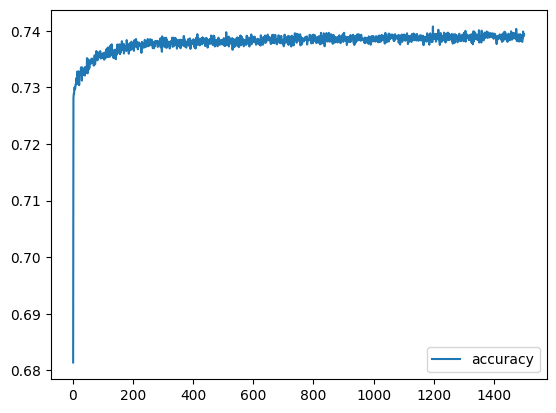

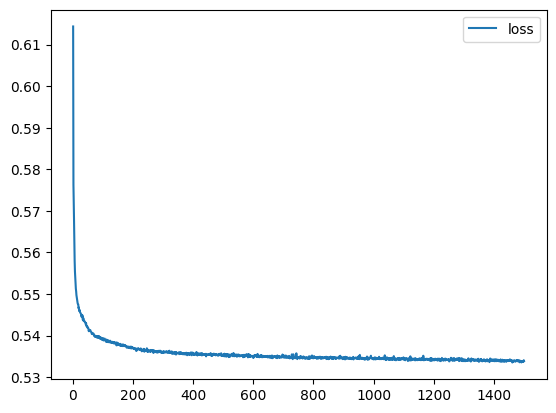

In [ ]:
# The performance on a single layer dramatically decreased. To test, compare a complex model with a large number of epochs
# Call compile_train for five nodes (5, 3) with the activation of tanh and increase epochs to 1500
nodes_layers = [{'units': 8, 'activation': 'tanh'},
                {'units': 7, 'activation': 'tanh'},
                {'units': 5, 'activation': 'tanh'},
                {'units': 3, 'activation': 'tanh'},
                {'units': 1, 'activation': 'tanh'}]
nn_model_10 = compile_train(nodes_layers, len(X_train_scaled[0]), 1500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7068 - loss: 0.5820
Epoch 2/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7320 - loss: 0.5504
Epoch 3/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7289 - loss: 0.5493
Epoch 4/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7261 - loss: 0.5502
Epoch 5/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7324 - loss: 0.5449
Epoch 6/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7289 - loss: 0.5464
Epoch 7/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7350 - loss: 0.5436
Epoch 8/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7356 - loss: 0.5447
Epoch 9/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7333 - loss: 0.5446
Epoch 10/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7320 - loss: 0.5400
Epoch 11/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7308 - loss: 0.5442
Epoch 12/250
804/804 ━━━━━━━━━━━━━━━

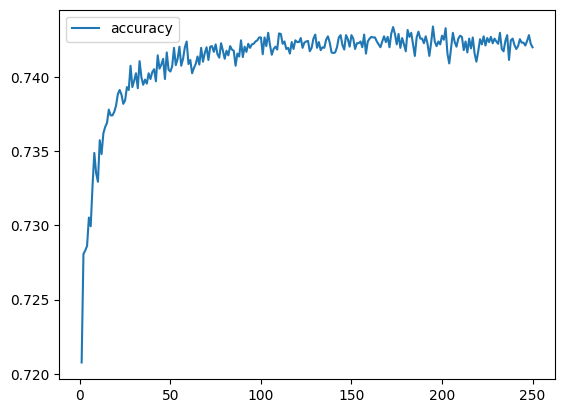

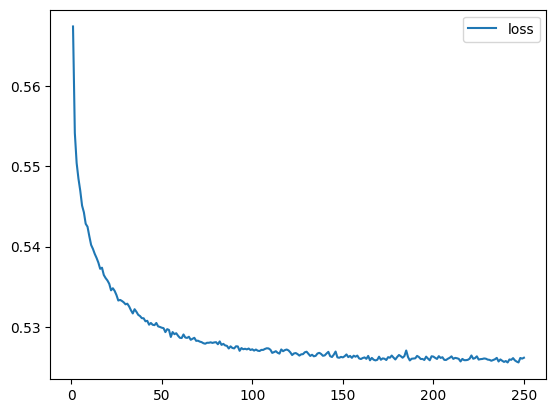

In [ ]:
# Dramatically increase the number of neurons tests
# Since performance on large number of epochs didn't help. Return to a small number of epochs, on a middle complex model, but this time, a very large number of neurons
# Call compile_train for three nodes (100, 50, 25) with the activation of tanh and increase epochs to 250
nodes_layers = [{'units': 100, 'activation': 'tanh'},
                {'units': 50, 'activation': 'tanh'},
                {'units': 25, 'activation': 'tanh'}]
nn_model_11 = compile_train(nodes_layers, len(X_train_scaled[0]), 250)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 500)                 │          24,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,201 (707.82 KB)

 Trainable params: 181,201 (707.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7089 - loss: 0.5820
Epoch 2/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7250 - loss: 0.5573
Epoch 3/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7238 - loss: 0.5542
Epoch 4/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7303 - loss: 0.5512
Epoch 5/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7309 - loss: 0.5481
Epoch 6/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7286 - loss: 0.5478
Epoch 7/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7291 - loss: 0.5500
Epoch 8/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7322 - loss: 0.5498
Epoch 9/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7243 - loss: 0.5508
Epoch 10/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7292 - loss: 0.5482
Epoch 11/500
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7308 - loss: 0.5447
Epoch 12/500
804/804 ━━━━━━━━━━━━━━

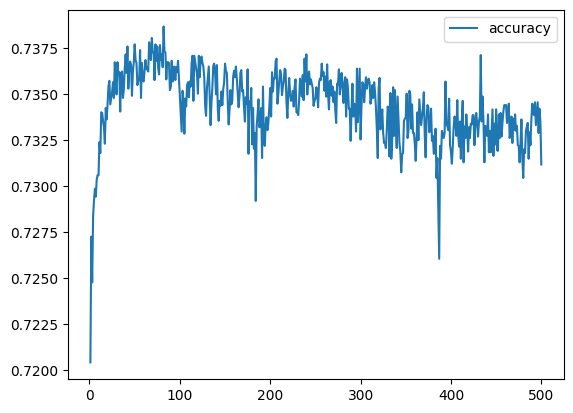

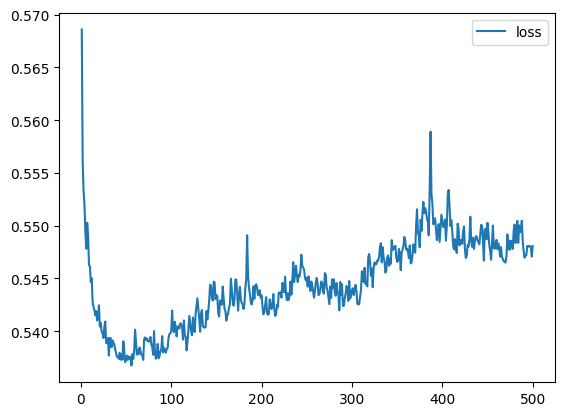

In [ ]:
# To test, combine relu and tanh activations and extend the number of epochs
# Call compile_train for five nodes (500, 250, 100, 50, 25) with the activation of tanh and increase epochs to 500
nodes_layers = [{'units': 500, 'activation': 'relu'},
                {'units': 250, 'activation': 'relu'},
                {'units': 100, 'activation': 'tanh'},
                {'units': 50, 'activation': 'tanh'},
                {'units': 25, 'activation': 'tanh'}]
nn_model_12 = compile_train(nodes_layers, len(X_train_scaled[0]), 500)

In [ ]:
# Conclussion: Running tests by changing activation (relu and tanh), number of epochs, number of hidden layers, or neurons,
# didn't seem to make significant changes. Simple models like the ones on the Starter_Code performce the same, yet, they take less computer power or time.
#
# Recommendation: I would recommend to run more tests, but focusing on the actual data. For example, adding/removing columns, changing the categorization/bucketing of other.

In [ ]:
# Since model 7 performed the best, the model will be exported to HDF5 file
# Export our model to HDF5 file
nn_model_07.save("AlphabetSoupCharity_Optimization.h5")